In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

pd.set_option('display.max_columns', None)

df = pd.read_csv("../Datasets/Plane Crashes.csv")

In [2]:
df.describe()

,YOM,Flight no.,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities
count,23225.000000,0.0,28512.000000,28535.000000,28482.000000,28535.000000,28526.000000,28536.000000
mean,1931.942519,NaN,3.052539,1.771649,7.705393,3.679727,0.109760,5.567389
std,285.486067,NaN,11.738151,2.520554,24.066368,15.288171,2.644296,16.713203
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1944.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1958.000000,NaN,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1974.000000,NaN,4.000000,3.000000,4.000000,1.000000,0.000000,5.000000
max,19567.000000,NaN,1924.000000,25.000000,509.000000,506.000000,297.000000,520.000000


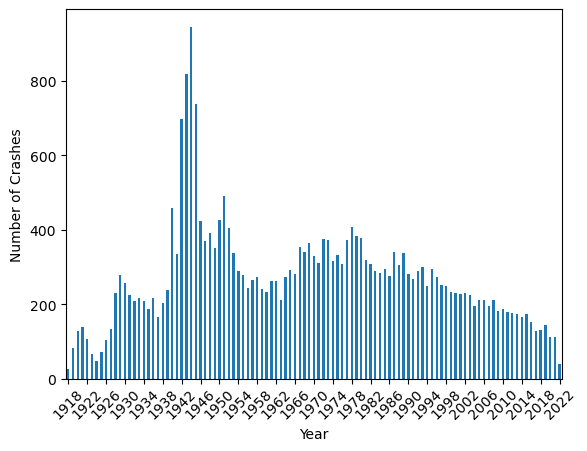

In [3]:
df["time_2"] = df["Time"].fillna("00:00")
df["datetime"] =  pd.to_datetime(df['Date'].astype(str) + ' ' + df['time_2'].astype(str))
df["year"] = df["datetime"].dt.year
crashes_by_year = df.groupby(df['year']).size()
# print(crashes_by_year)

# plot year vs number of rows
ax = crashes_by_year.plot(kind='bar', xlabel='Year', ylabel='Number of Crashes')

# Set the x-axis tick locator
ax.tick_params(axis='x', which='major', pad=2)
ax.set_xticklabels(crashes_by_year.index, rotation=45)
ax.set_xticks(np.arange(0, len(crashes_by_year.index), 4))

# show the plot
plt.show()

In [4]:
df.drop(columns=['time_2'],inplace=True)
df.head(10)

,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,datetime,year
0,1918-05-02,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32084,Takeoff (climb),Test,No,Airport (less than 10 km from airport),Dayton - Dayton,NaN,NaN,NaN,Dayton-McCook Field Ohio,United States of America,North America,2.0,2.0,0.0,0.0,0.0,2,The single engine airplane departed Dayton-McC...,Technical failure,1918-05-02 00:00:00,1918
1,1918-06-08,NaN,Handley Page V/1500,Handley Page Aircraft Company Ltd,E4104,Takeoff (climb),Test,Yes,Airport (less than 10 km from airport),Cricklewood - Cricklewood,NaN,1918.0,NaN,Cricklewood London Metropolis,United Kingdom,Europe,6.0,5.0,0.0,0.0,0.0,5,"Assembled at Cricklewood Airfield in May 1918,...",Technical failure,1918-06-08 00:00:00,1918
2,1918-06-11,NaN,Avro 504,Royal Air Force - RAF,A8544,Flight,Training,Yes,"Plain, Valley",Abukir - Abukir,NaN,NaN,NaN,Abukir (Abu Qir) Alexandria,Egypt,Africa,2.0,1.0,0.0,0.0,0.0,1,The single engine aircraft was completing a lo...,Unknown,1918-06-11 00:00:00,1918
3,1918-06-19,NaN,De Havilland DH.4,United States Signal Corps - USSC,AS-32098,Flight,Military,No,Airport (less than 10 km from airport),Wright Patterson AFB-Wright Patterson AFB,NaN,NaN,NaN,Wright-Patterson AFB (Dayton) Ohio,United States of America,North America,1.0,1.0,0.0,0.0,0.0,1,"Lt. Frank Stuart Patterson, son and nephew of ...",Technical failure,1918-06-19 00:00:00,1918
4,1918-06-24,NaN,Breguet 14,French Air Force - Armée de l'Air,AS-4130,Landing (descent or approach),Military,Yes,NaN,NaN,NaN,NaN,NaN,France All France,France,Europe,NaN,0.0,NaN,0.0,0.0,0,The aircraft crashed iupon landing somewhere i...,Unknown,1918-06-24 00:00:00,1918
5,1918-07-14,NaN,Fairey III,Marine Aeroplane Depot,N2851,Landing (descent or approach),Delivery,No,Airport (less than 10 km from airport),Isle of Grain - Usworth - Glasgow,NaN,NaN,NaN,Usworth AFB (RAF Hylton) Tyne and Wear,United Kingdom,Europe,1.0,1.0,0.0,0.0,0.0,1,The pilot departed Isle of Grain on a delivery...,Unknown,1918-07-14 00:00:00,1918
6,1918-07-18,NaN,De Havilland DH.6,Royal Air Force - RAF,B3087,Flight,Training,No,Airport (less than 10 km from airport),Seaton Carew - Seaton Carew,NaN,NaN,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,2.0,0.0,0.0,0.0,2,The crew was completing a local training fligh...,Unknown,1918-07-18 00:00:00,1918
7,1918-08-19,15H 15M 0S,Handley Page H.P.12,Royal Air Force - RAF,D4593,Flight,Test,No,"Plain, Valley",Castle Bromwich - Castle Bromwich,NaN,NaN,NaN,Maxstoke Warwickshire,United Kingdom,Europe,2.0,2.0,5.0,5.0,0.0,7,The aircraft departed Castle Bromwich for a te...,Technical failure,1918-08-19 15:15:00,1918
8,1918-08-23,NaN,Tellier T.3,Portuguese Air Force - Aeronáutica Militar,5,Flight,Survey / Patrol / Reconnaissance,No,"Lake, Sea, Ocean, River",NaN,NaN,NaN,NaN,Cascais Estremadura - Lisbon District,Portugal,Europe,2.0,2.0,0.0,0.0,0.0,2,The seaplane crashed in unknown circumstances ...,Unknown,1918-08-23 00:00:00,1918
9,1918-08-26,NaN,Blackburn R.T.1 Kangaroo,Royal Air Force - RAF,B9976,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Seaton Carew AFB - Seaton Carew AFB,B9976,1918.0,NaN,Seaton Carew AFB Durham,United Kingdom,Europe,2.0,0.0,0.0,0.0,0.0,0,"On final approach in bad visibility, aircraft ...",Unknown,1918-08-26 00:00:00,1918


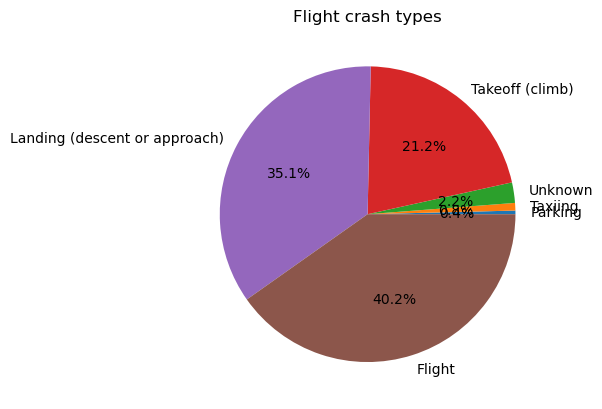

In [5]:
df['Flight phase'] = df['Flight phase'].fillna('Unknown')
crashes_by_phase=df.groupby(df['Flight phase']).size().sort_values()

plt.pie(crashes_by_phase, labels=crashes_by_phase.index, autopct='%1.1f%%')
plt.title('Flight crash types')
plt.show()

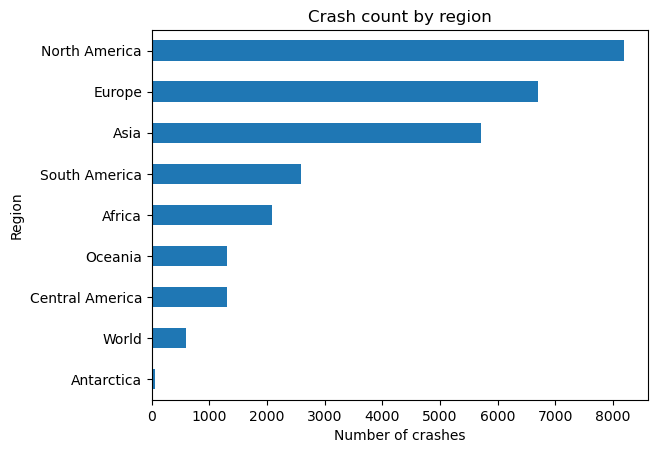

In [6]:
df['Region'] = df['Region'].fillna('World')
crashes_by_region=df.groupby(df['Region']).size().sort_values()


crashes_by_region.plot(kind='barh')

# Add axis labels and title
plt.xlabel('Number of crashes')
plt.ylabel('Region')
plt.title('Crash count by region')

# Display the chart
plt.show()

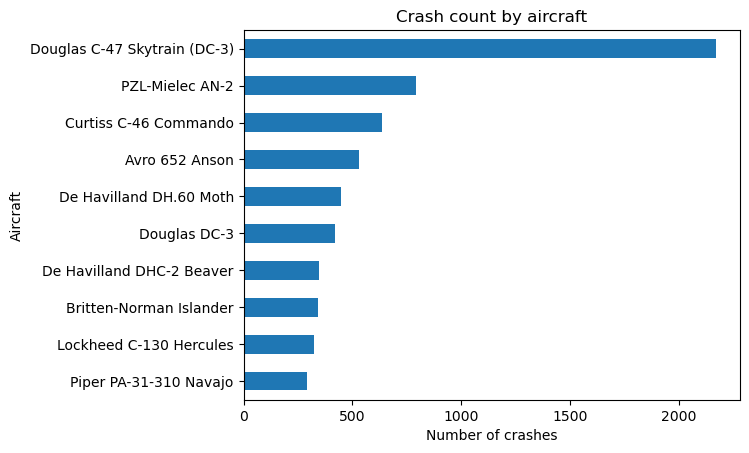

In [7]:
df['Aircraft'] = df['Aircraft'].fillna('Other')
crashes_by_aircraft=df.groupby(df['Aircraft']).size().sort_values(ascending=False).head(10)


crashes_by_aircraft.sort_values().plot(kind='barh')

# Add axis labels and title
plt.xlabel('Number of crashes')
plt.ylabel('Aircraft')
plt.title('Crash count by aircraft')

# Display the chart
plt.show()

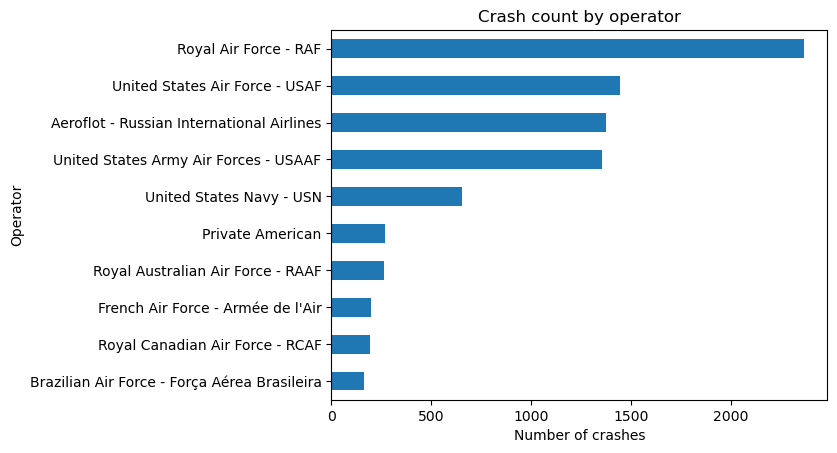

In [8]:
df['Operator'] = df['Operator'].fillna('Other')
crashes_by_operator = df.groupby(df['Operator']).size().sort_values(ascending=False).head(10)

crashes_by_operator.sort_values().plot(kind='barh')

# Add axis labels and title
plt.xlabel('Number of crashes')
plt.ylabel('Operator')
plt.title('Crash count by operator')

# Display the chart
plt.show()


In [10]:
df_last_10_years = df[df['year'] >= 2020]
df_last_10_years.head(10)


,Date,Time,Aircraft,Operator,Registration,Flight phase,Flight type,Survivors,Crash site,Schedule,MSN,YOM,Flight no.,Crash location,Country,Region,Crew on board,Crew fatalities,Pax on board,PAX fatalities,Other fatalities,Total fatalities,Circumstances,Crash cause,datetime,year
28271,2020-01-02,NaN,Antonov AN-12,Sudanese Air Force - Al Quwwat al-Jawwiya As-S...,NaN,Takeoff (climb),Military,No,Airport (less than 10 km from airport),Geneina - Khartoum,2340606,1962.0,NaN,Geneina West Darfur (<U+063A><U+0631><U+0628> ...,Sudan,Africa,7.0,7.0,11.0,11.0,0.0,18,"Shortly after takeoff from Geneina Airport, th...",Unknown,2020-01-02 00:00:00,2020
28272,2020-01-03,NaN,Harbin Yunsunji Y-12,Sri Lanka Air Force,SCL-857,Flight,Survey / Patrol / Reconnaissance,No,"Plain, Valley",Wirawila - Colombo,0021,1990.0,NaN,Haputale Uva (<U+0B8A><U+0BB5><U+0BBE>),Sri Lanka,Asia,4.0,4.0,0.0,0.0,0.0,4,Crashed in unknown circumstances in Haputale w...,Unknown,2020-01-03 00:00:00,2020
28273,2020-01-08,6H 18M 0S,Boeing 737-800,Ukraine International Airlines,UR-PSR,Takeoff (climb),Scheduled Revenue Flight,No,"Plain, Valley",Tehran - Kiev,38124,2016.0,NaN,Sabashahr Tehran City District,Iran,Asia,9.0,9.0,167.0,167.0,0.0,176,"On Wednesday, January 08, 2020, at 00:53, the ...","Terrorism act, Hijacking, Sabotage",2020-01-08 06:18:00,2020
28274,2020-01-09,NaN,Lockheed C-130 Hercules,South African Air Force,403,Landing (descent or approach),Military,Yes,Airport (less than 10 km from airport),Beni - Goma,3750,1962.0,NaN,Goma Nord-Kivu,Democratic Republic of Congo,Africa,8.0,0.0,59.0,0.0,0.0,0,The four engine airplane was completing a flig...,Unknown,2020-01-09 00:00:00,2020
28275,2020-01-12,NaN,De Havilland DHC-2 Beaver,Pakistani Government,AP-AMB,Flight,Spraying (Agricultural),No,"Plain, Valley",Rahim Yar Khan - Rahim Yar Khan,1415,1960.0,NaN,Sadiqabad Punjab (<U+067E><U+0646><U+062C><U+0...,Pakistan,Asia,2.0,2.0,0.0,0.0,0.0,2,The airplane departed Rahim Yar Khan-Sheikh Za...,Technical failure,2020-01-12 00:00:00,2020
28276,2020-01-16,8H 6M 0S,Beechcraft 200 Super King Air,LifeMed Alaska,N547LM,Takeoff (climb),Ambulance,Yes,"Lake, Sea, Ocean, River",Dutch Harbor - Adak,BB-1642,1998.0,NaN,Dutch Harbor Alaska,United States of America,North America,1.0,0.0,2.0,0.0,0.0,0,"On January 16, 2020, about 0806 Alaska standar...",Unknown,2020-01-16 08:06:00,2020
28277,2020-01-23,14H 0M 0S,Lockheed C-130 Hercules,Coulson,N134CG,Flight,Fire fighting,No,"Plain, Valley",Richmond - Richmond,4904,1981.0,NaN,Peak View New South Wales,Australia,Oceania,3.0,3.0,0.0,0.0,0.0,3,The airplane departed Richmond Airbase and was...,Unknown,2020-01-23 14:00:00,2020
28278,2020-01-23,10H 50M 0S,Cessna 550 Citation II,South African Civil Aviation Authority,ZS-CAR,Flight,Calibration,No,Mountains,George - George,S550-0078,1985.0,NaN,George Western Cape,South Africa,Africa,3.0,3.0,0.0,0.0,0.0,3,A Cessna S550 Citation S/II of the South Afric...,Human factor,2020-01-23 10:50:00,2020
28279,2020-01-24,10H 0M 0S,Stinson SR-10 Reliant,Anthony L. Wright,N50249,Flight,Private,Yes,Airport (less than 10 km from airport),Auburn - Auburn,77-458,NaN,NaN,Auburn California,United States of America,North America,1.0,1.0,2.0,1.0,0.0,2,"On January 24, 2020, about 1000 Pacific standa...",Technical failure,2020-01-24 10:00:00,2020
28280,2020-01-27,13H 9M 0S,Bombardier Global Express/XRS,United States Air Force - USAF,11-9358,Flight,Training,No,"Plain, Valley",Kandahar - Kandahar,9358,2009.0,NaN,Sharana AFB Parwan,Afghanistan,Asia,2.0,2.0,0.0,0.0,0.0,2,"On 27 January 2020, at approximately 1309 hour...",Human factor,2020-01-27 13:09:00,2020


In [108]:
# Create a geolocator object
geolocator = Nominatim(user_agent="my-application1")

# Define a function to geocode a location string and return the latitude and longitude
def get_lat_lon(location):
    loc = geolocator.geocode(location)
    if loc is not None:
        return loc.latitude, loc.longitude
    else:
        return None, None
df["year"]
df_last_10_years = df[df["year"] >= 2021]
# Apply the geocoding function to each row of the DataFrame and create new columns for the latitude and longitude
df_last_10_years[['Latitude', 'Longitude']] = df_last_10_years['Crash location'].apply(lambda x: pd.Series(get_lat_lon(x)))


C:\Users\Razmig Avedis\AppData\Local\Temp\ipykernel_10648\3243541032.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10_years[['Latitude', 'Longitude']] = df_last_10_years['Crash location'].apply(lambda x: pd.Series(get_lat_lon(x)))
C:\Users\Razmig Avedis\AppData\Local\Temp\ipykernel_10648\3243541032.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_10_years[['Latitude', 'Longitude']] = df_last_10_years['Crash location'].apply(lambda x: pd.Series(get_lat_lon(x)))


In [52]:
df["Survivors"] = df["Crew on board"] + df["Pax on board"] - df["Crew fatalities"] - df["PAX fatalities"]

In [53]:
flight_types_mapping = {
    "Test": "testing/training",
    "Training": "testing/training",
    "Calibration": "testing/training",
    "Delivery": "delivery",
    "Postal (mail)": "delivery",
    "Supply": "delivery",
    "Cargo": "delivery",
    "Fire fighting": "support",
    "Refuelling": "support",
    "Spraying (Agricultural)": "support",
    "Ambulance": "support",
    "Ferry": "support",
    "Topographic": "support",
    "Humanitarian": "support",
    "Calibration": "support",
    "Meteorological / Weather": "support",
    "Geographical / Geophysical / Scientific": "support",
    "Aerial photography": "private/business",
    "Scheduled Revenue Flight": "private/business",
    "Private": "private/business",
    "Charter/Taxi (Non Scheduled Revenue Flight)": "private/business",
    "Demonstration": "private/business",
    "Executive/Corporate/Business": "private/business",
    "Cinematography": "private/business",
    "Skydiving / Paratroopers": "private/business",
    "Aerobatic": "private/business",
    "Positioning": "private/business",
    "Military": "government",
    "Government": "government",
    "Survey / Patrol / Reconnaissance": "government",
    "Illegal (smuggling)": "illegal",
    "Bombing": "illegal"
}

In [82]:
df.dropna(subset=["Flight type"], inplace=True)
df["flight_group"] = df["Flight type"].map(flight_types_mapping)

In [80]:
df_crash_cause = df.groupby('flight_group')['Crash cause'].value_counts().unstack(fill_value=0)
df_crash_cause = df_crash_cause.reset_index().rename_axis(None, axis=1)
df_crash_cause.columns = ['group'] + list(df['Crash cause'].unique())
df_crash_cause['number of crashes'] = df.groupby('flight_group').size().values

In [81]:
df_crash_cause

,group,Technical failure,Unknown,Weather,Human factor,Other causes,"Terrorism act, Hijacking, Sabotage",number of crashes
0,delivery,1366,152,1011,178,949,259,3915
1,government,961,82,1188,475,2748,337,5791
2,illegal,191,6,101,376,213,10,897
3,private/business,5285,293,2712,192,3141,739,12362
4,support,713,43,353,24,438,78,1649
5,testing/training,1399,51,836,17,1457,105,3865


In [115]:
df_last_10_years = df_last_10_years.dropna(subset=['Latitude', 'Longitude'])
map_osm = folium.Map(location=[df_last_10_years['Latitude'].mean(), df_last_10_years['Longitude'].mean()], zoom_start=12)

obs = list(zip(df_last_10_years['Latitude'], df_last_10_years['Longitude']))
for lat, lon in obs:
    folium.CircleMarker(location=[lat, lon], radius=10).add_to(map_osm)

map_osm.render()
map_osm.save("Map.html") 

In [57]:
df_survivors = pd.DataFrame()
for group in df["flight_group"].unique():
    df_tmp = pd.DataFrame()
    df_tmp["group"] = [group]
    df_tmp["number of crashes"] = [len(df[df["flight_group"] == group])]
    df_tmp["total on-board"] = df[df["flight_group"] == group]["Crew on board"].sum() + df[df["flight_group"] == group]["Pax on board"].sum()
    df_tmp["number of survivors"] = df[df["flight_group"] == group]["Survivors"].sum()
    df_tmp["number of cauelties"] = df[df["flight_group"] == group]["Crew fatalities"].sum() + df[df["flight_group"] == group]["PAX fatalities"].sum() + df[df["flight_group"] == group]["Other fatalities"].sum()
    df_tmp["percentage_survivors"] = df_tmp["number of survivors"]*100/df_tmp["total on-board"]
    df_survivors = pd.concat([df_survivors,df_tmp])

In [58]:
df_survivors

,group,number of crashes,total on-board,number of survivors,number of cauelties,percentage_survivors
0,testing/training,3865,15763.0,5967.0,10293.0,37.854469
0,government,5791,47323.0,13951.0,33796.0,29.480380
0,delivery,3915,13430.0,6379.0,8105.0,47.498138
0,support,1649,6503.0,2469.0,4118.0,37.967092
0,private/business,12362,218292.0,120196.0,98989.0,55.062027
0,illegal,897,5167.0,1857.0,3380.0,35.939617
